<a href="https://colab.research.google.com/github/T2061/InternshipStudio_Project/blob/master/MyProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                      **Project Title:**
                    



#        Marketing Campaign for Banking Products

# Data Description:

The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan).


Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.


# **Context:**
The bank has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , the bank wants to convert the liability based customers to personal loan customers. (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign

# **Steps and tasks:**

1. Import the datasets and libraries, check datatype, statistical summary, shape, null values etc


2. Check if you need to clean the data for any of the variables

First of all we will import data set for classification

In [ ]:
#importing dataset from device
from google.colab import files
uploaded = files.upload()

Saving dimi.csv to dimi.csv


imporing all the necessary libraries that will help in different steps of project


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

import io
import pandas as pd

df2 = pd.read_csv(io.BytesIO(uploaded['dimi.csv']))

#printing information regarding data set

print(df2.info())
print(df2)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
        ID  Age  Experience  ...  CD Account  Onlin

Following are the information regarding dataset
which shows the features and meaning of the feature


# **Attribute** Information: 
● ID: Customer ID

● Age: Customer's age in completed years

● Experience: #years of professional experience

● Income: Annual income of the customer ($000)

● ZIP Code: Home Address ZIP code.

● Family: Family size of the customer

● CCAvg: Avg. spending on credit cards per month ($000)

● Education: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional

● Mortgage: Value of house mortgage if any. ($000)

● Personal Loan: Did this customer accept the personal loan offered in the last
campaign?

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?

● Online: Does the customer use internet banking facilities?


● Credit card: Does the customer use a credit card issued by the bank?


In [ ]:
df2.tail(10)
#last 10 rows of dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [ ]:
df2.head()
# first 5 values of dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
print(df2.isna().sum())
# as it is shown by output that there is no missing value in the dataset

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

In [ ]:

df2.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df1=df2
df=df2.drop(['ID'],axis=1)
#dropping the ID column from dataset since its just a serial no

In [ ]:
df.head(10)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
#finding correlation between age and experience
exp=df['Experience']
age=df['Age']

correlation=exp.corr(age)
print(correlation)

0.9942148569683321


correlation is very high hence we will drop experience column from that dataset


In [ ]:
df.head(5)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:

df=df.drop(['Experience'],axis=1)
print(df)

#we have dropped the column experience

      Age  Income  ZIP Code  ...  CD Account  Online  CreditCard
0      25      49     91107  ...           0       0           0
1      45      34     90089  ...           0       0           0
2      39      11     94720  ...           0       0           0
3      35     100     94112  ...           0       0           0
4      35      45     91330  ...           0       0           1
...   ...     ...       ...  ...         ...     ...         ...
4995   29      40     92697  ...           0       1           0
4996   30      15     92037  ...           0       1           0
4997   63      24     93023  ...           0       0           0
4998   65      49     90034  ...           0       1           0
4999   28      83     92612  ...           0       1           1

[5000 rows x 12 columns]


# **3. EDA: Study the data distribution in each attribute and target variable, share your findings.**

● Number of unique in each column?


● Number of people with zero mortgage?


● Number of people with zero credit card spending per month?


● Value counts of all categorical columns.


● Univariate and Bivariate analysis

from here onwards we are doing exploratiry data analysis

In [ ]:
df.apply(lambda y:len(y.unique()))
# finding unique value in each column


Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [ ]:
zero_mortage=df[df['Mortgage'] == 0]['Mortgage'].count()

# count of 0 in Mortgage column

print("count of 0 mortgage",zero_mortage)

count of 0 mortgage 3462


In [ ]:
dfExp = df.loc[df['Mortgage'] ==1]
negExp = df.Mortgage == 0

#value count of mortgage

In [ ]:
df.Family.value_counts()

#value count of family


1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
df.Education.value_counts()
#value count of Educationa 
#this is classified features

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
df['Securities Account'].value_counts()

#value count of Security Account

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
df['CD Account'].value_counts()

#CD Account has only two values 0 and 1


0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
df.head(5)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df[df['CreditCard'] == 0]['CreditCard'].count()

#this shows how many people does not have Credit Card

3530

In [ ]:
df[df['CCAvg'] == 0.0]['CCAvg'].count()

#people that does not spend money through credit card per month


106

In [ ]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

# Bivariate Analysis

(array([4698.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         302.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

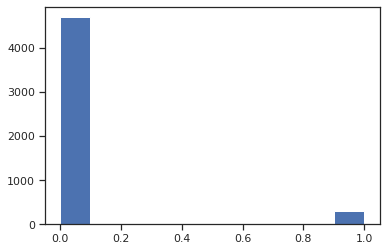

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.hist(df['CD Account'])
#histogram shows that 
#plt shows very less peple have CD Account

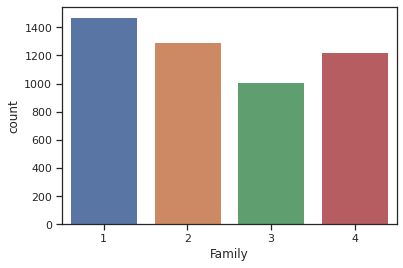

In [ ]:
sns.countplot(df.Family)

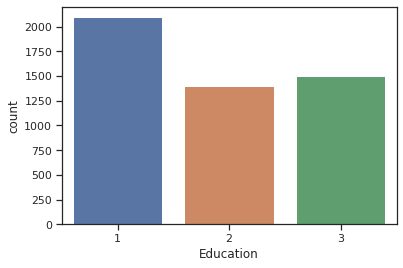

In [ ]:
sns.countplot(df.Education)

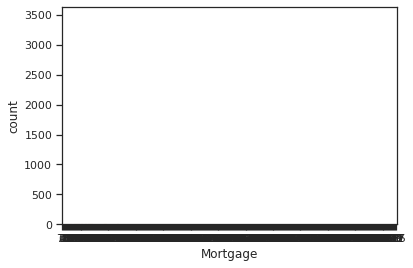

In [ ]:
sns.countplot(df.Mortgage)

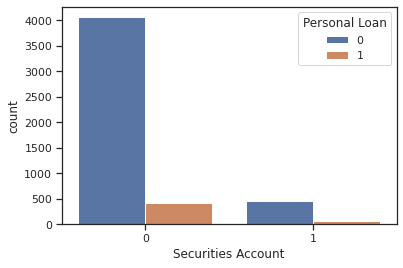

In [ ]:
sns.countplot(x="Securities Account",data=df,hue='Personal Loan')

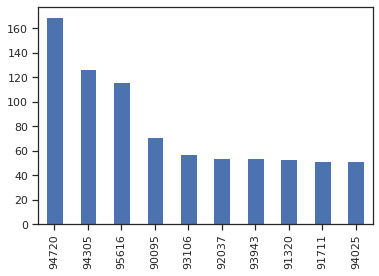

In [ ]:

df['ZIP Code'].value_counts().head(10).plot.bar()

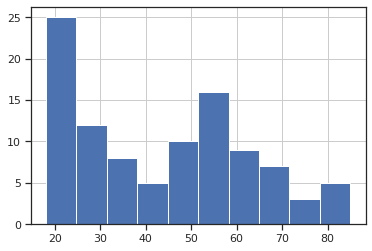

In [ ]:
df['Income'].value_counts().head(100).hist()

In [ ]:
df['Income'].value_counts().head(100)


44     85
38     84
81     83
41     82
39     81
       ..
118    19
110    19
155    19
119    18
123    18
Name: Income, Length: 100, dtype: int64

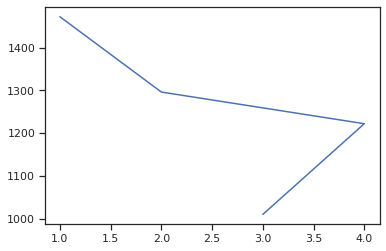

In [ ]:
df['Family'].value_counts().plot.line()

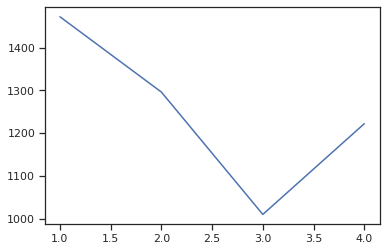

In [ ]:

df['Family'].value_counts().sort_index().plot.line()

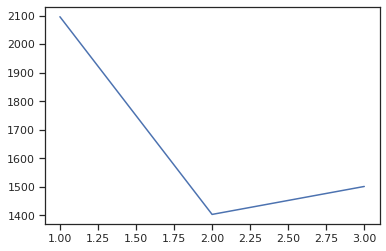

In [ ]:
df['Education'].value_counts().sort_index().plot.line()

# **univariate analysis**

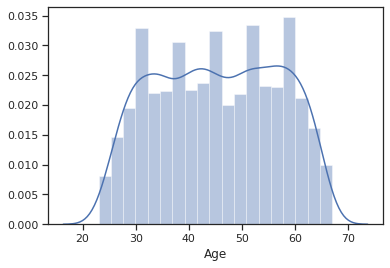

In [ ]:
sns.distplot(df.Age)

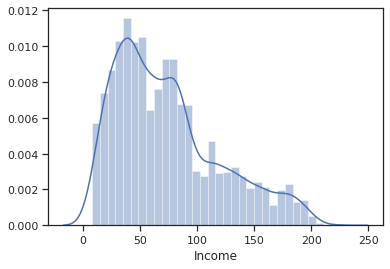

In [ ]:
sns.distplot(df.Income)
#left skewness

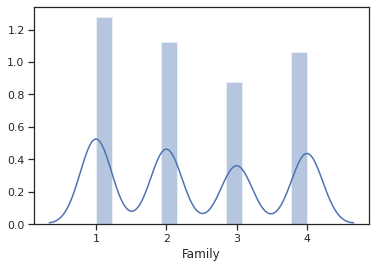

In [ ]:
sns.distplot(df.Family)

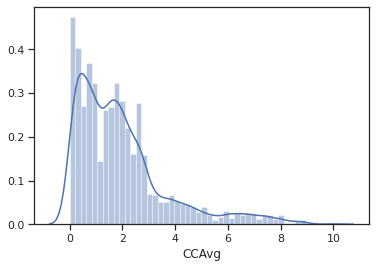

In [ ]:
sns.distplot(df.CCAvg)
# left skewess in plt

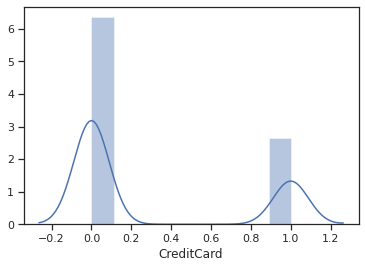

In [ ]:
sns.distplot(df.CreditCard)

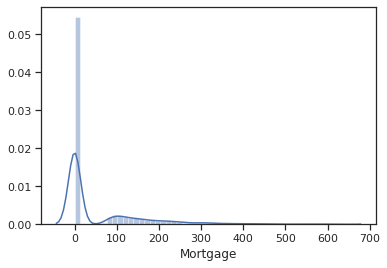

In [ ]:
sns.distplot(df.Mortgage)


# similary most of mortgage data has value zero

# correlation between features

which helps in checking dependencies of features on each other

In [ ]:
edu=df['Education']
age=df['Age']

correlation=edu.corr(age)
print(correlation)

0.04133438336063444


In [ ]:
fam=df['Family']
Income=df['Income']

correlation=fam.corr(Income)
print(correlation)

-0.15750078548216168


In [ ]:
cAvg=df['CCAvg']
correlation=fam.corr(cAvg)
print(correlation)

-0.10927450575713289


In [ ]:
credit=df['CreditCard']

correlation=cAvg.corr(credit)
print(correlation)

-0.006689494411293744


In [ ]:
pl=df['Personal Loan']

correlation=pl.corr(Income)
print(correlation)

0.5024622924949348


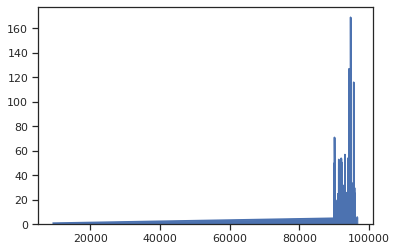

In [ ]:
df['ZIP Code'].value_counts().sort_index().plot.area()


Inplace of finding correlation we can plot all at once

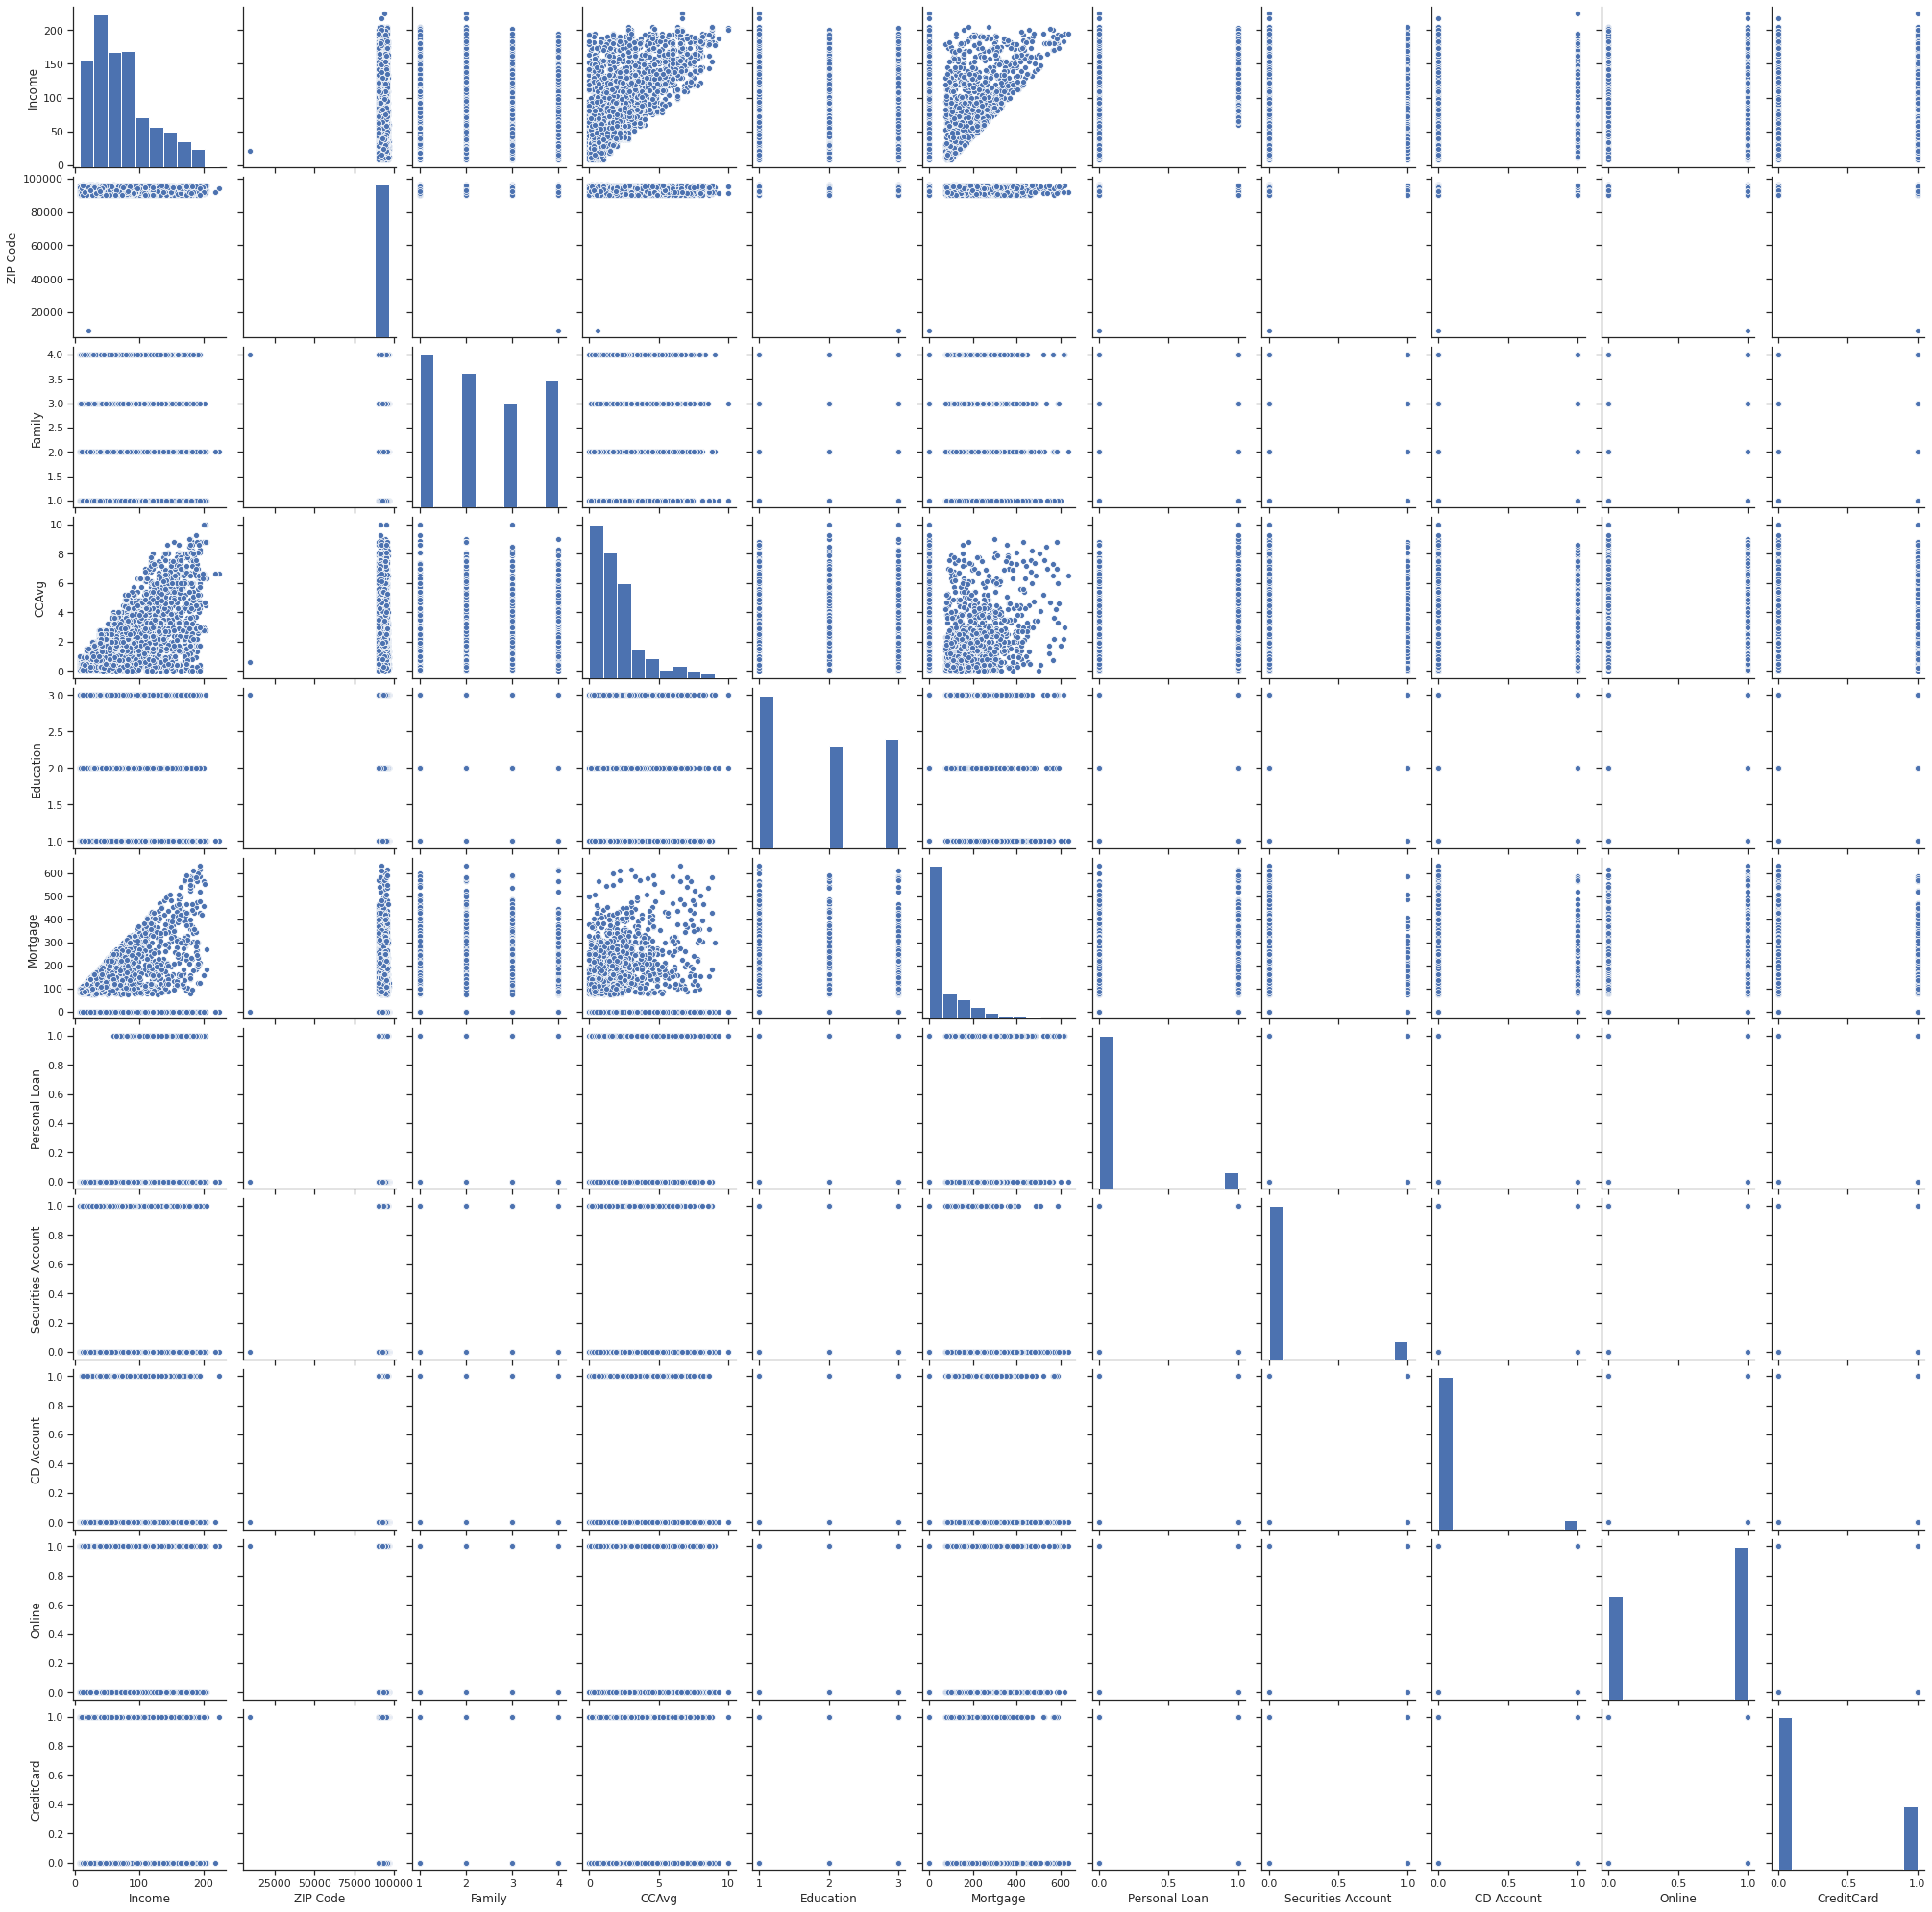

In [ ]:
sns.pairplot(df.iloc[:,1:])

In following code we will drop zip code because it is showing area of customer and has no relation with personal loan  

In [ ]:
df=df.drop('ZIP Code',axis=1)

#dropped zip code  since its just showing the address of customer


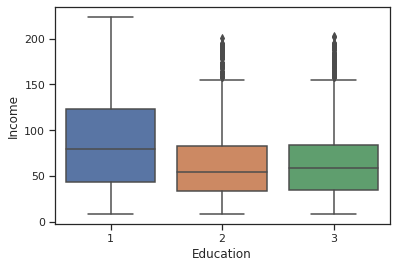

In [ ]:
sns.boxplot(x='Education',y='Income',data=df)

#plt between education and income


The above plot shows that how much educated people have more income

and we can see that education value =1 has more income as compared to other

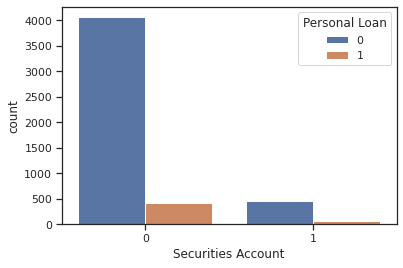

In [ ]:
sns.countplot(x=df['Securities Account'], data=df,hue=df['Personal Loan'])


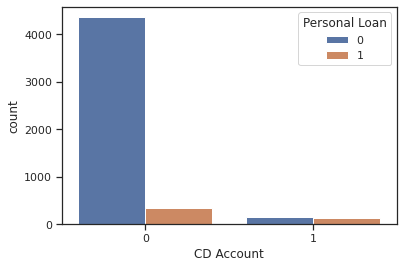

In [ ]:
sns.countplot(x=df['CD Account'],data=df,hue=df['Personal Loan'])

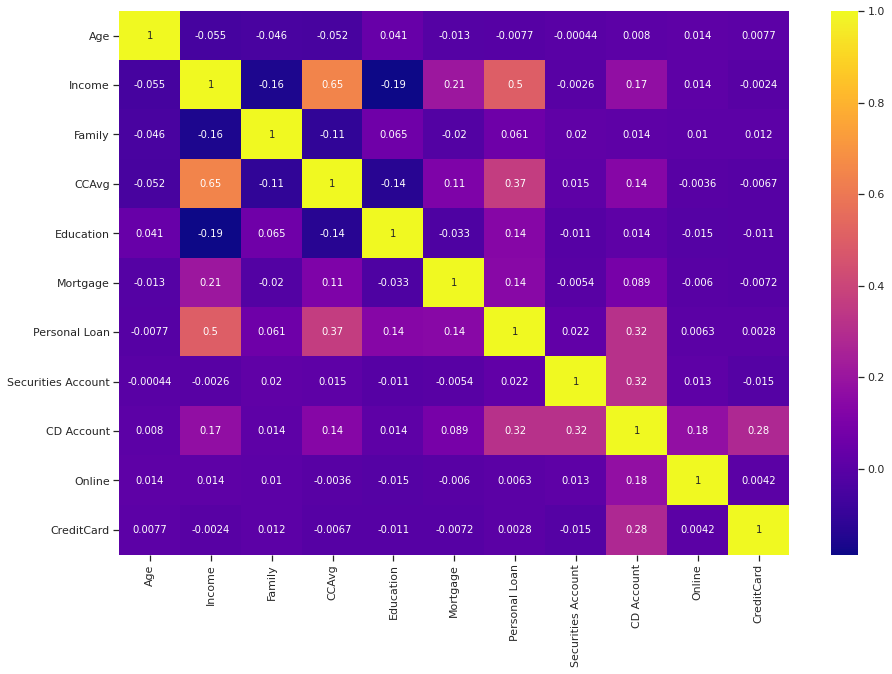

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),cmap='plasma',annot=True)

#correlation plot of modified data set

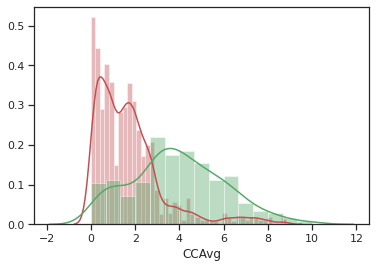

In [ ]:
sns.distplot( df[df['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot( df[df['Personal Loan'] == 1]['CCAvg'], color = 'g')
#plot which shows dependency of personal loan on CCAvg

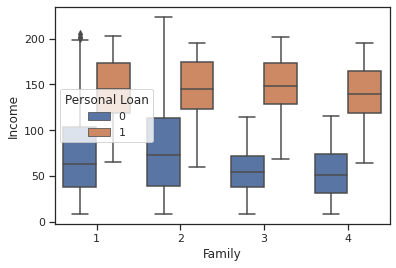

In [ ]:
sns.boxplot(x=df['Family'],y=df['Income'],hue=df['Personal Loan'])



Above plot shows relation between loan income and family how they are related to each other 

# **4. Apply necessary transformations for the feature variables**

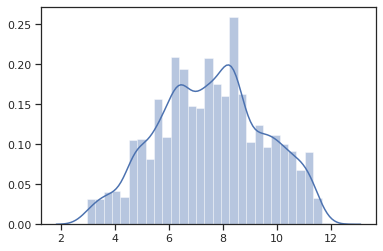

In [ ]:
dx=df.loc[:,df.columns !="Personal Loan"]
dy=df[['Personal Loan']]
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(dx['Income'].values.reshape(-1,1))
sns.distplot(pt.transform(dx['Income'].values.reshape(-1,1)))

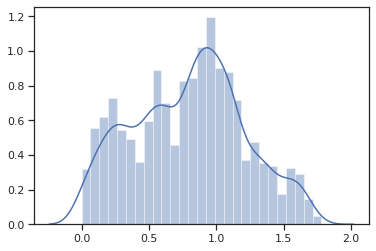

In [ ]:
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(dx['CCAvg'].values.reshape(-1,1))
sns.distplot(pt.transform(dx['CCAvg'].values.reshape(-1,1)))


In [ ]:
dx["Mortgage_Int"]=pd.cut(dx['Mortgage'],
                          bins=[0,100,200,300,400,500,600,700],
                          labels=[0,1,2,3,4,5,6],
                          include_lowest=True)
dx.drop('Mortgage',axis=1,inplace=True)

In [ ]:
dx.head(10)

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,49,4,1.6,1,1,0,0,0,0
1,45,34,3,1.5,1,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,1,0
5,37,29,4,0.4,2,0,0,1,0,1
6,53,72,2,1.5,2,0,0,1,0,0
7,50,22,1,0.3,3,0,0,0,1,0
8,35,81,3,0.6,2,0,0,1,0,1
9,34,180,1,8.9,3,0,0,0,0,0


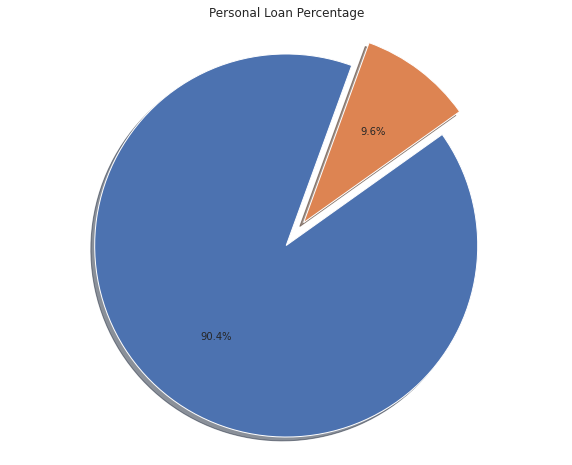

In [ ]:
##  univariate Analysis
##9.6%of all the applicants gets apprved for personal loan
tempDF=pd.DataFrame(df['Personal Loan'].value_counts()).reset_index()
tempDF.columns=["Labels","Personal Loan"]
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(tempDF["Personal Loan"],explode=explode ,autopct="%1.1f%%",
        shadow=True,startangle=70)
ax1.axis('equal')
plt.title("Personal Loan Percentage")
plt.show() 

# **5. Normalise your data and split the data into training and test set in the ratio of 70:30 respectively**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sx=StandardScaler()
sy=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(dx, dy, test_size=0.3,stratify=dy, random_state=0)
sx.fit_transform(X_train)
sx.transform(X_test)

array([[-0.97265109,  2.31851937, -1.21736706, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [ 0.85873161,  0.16296952, -0.34389746, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [ 0.24827071,  1.18631137, -1.21736706, ..., -1.19253735,
        -0.65376311, -0.47490853],
       ...,
       [ 0.68431421, -0.92569202, -0.34389746, ..., -1.19253735,
         1.52960605,  0.68340496],
       [-0.97265109, -0.53377386, -1.21736706, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [-0.01335539, -0.33781479,  0.52957214, ...,  0.83854816,
        -0.65376311, -0.47490853]])

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)


      Age  Income  Family  CCAvg  ...  CD Account  Online  CreditCard  Mortgage_Int
3789   51      24       3    0.4  ...           0       1           1             0
758    64      35       1    1.5  ...           0       0           0             0
2868   52      31       4    1.8  ...           0       1           1             0
2550   32      20       1    0.5  ...           0       1           0             1
2150   62      54       1    0.8  ...           0       0           1             0
...   ...     ...     ...    ...  ...         ...     ...         ...           ...
3597   56      51       3    2.0  ...           0       1           0             0
4670   52     194       1    1.7  ...           0       1           0             0
988    63      32       1    1.9  ...           0       0           0             0
2037   35      52       2    1.0  ...           0       0           1             0
2174   30     123       2    3.1  ...           0       1           0       

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logr = LogisticRegression(solver="liblinear")
logr.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logr.predict(X_test)
print(logr.score(X_test, y_test))

0.9486666666666667


[[1338   18]
 [  59   85]]
0.5264557713052859
0.5902777777777778
0.9486666666666667
0.788501720747296


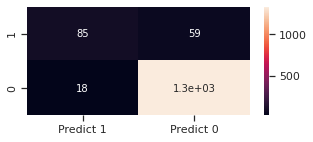

In [ ]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,2))
sns.heatmap(df_cm, annot=True)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.average_precision_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))

In [ ]:
cm

array([[  85,   59],
       [  18, 1338]])

# **Decision tree classifier**

---



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_model.score(X_test , y_test)


0.9766666666666667

In [ ]:
y_predict = dt_model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0])

confusion matrix =  [[1345   11]
 [  24  120]]
average precision score =  0.7793587786259543
recall score =  0.8333333333333334
accuracy score =  0.9766666666666667
roc_auc_score =  0.9126106194690266


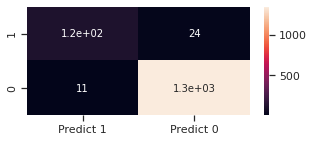

In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,2))
sns.heatmap(df_cm, annot=True)
print("confusion matrix = ",metrics.confusion_matrix(y_test,y_predict))
print("average precision score = ",metrics.average_precision_score(y_test,y_predict))
print("recall score = ", metrics.recall_score(y_test,y_predict))
print("accuracy score = ",metrics.accuracy_score(y_test,y_predict))
print("roc_auc_score = ",metrics.roc_auc_score(y_test,y_predict))

In [ ]:


cm

array([[ 120,   24],
       [  11, 1345]])

# **Build KNN model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [ ]:
NNH.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

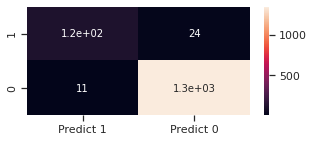

In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,2))
sns.heatmap(df_cm, annot=True)
#print(confusion_matrix(y_test,y_predict))


In [ ]:
cm


array([[ 120,   24],
       [  11, 1345]])

In [ ]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [ ]:
import sklearn
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    
    scores = sklearn.metrics.accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was

The optimal number of neighbors is 3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


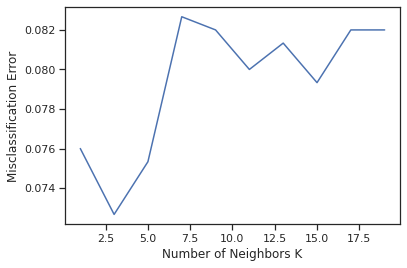

In [ ]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(sklearn.metrics.accuracy_score(y_test, y_pred))
print(sklearn.metrics.recall_score(y_test, y_pred))

0.918
0.3680555555555556


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


confusion matrix =  [[1345   11]
 [  24  120]]
average precision score =  0.7793587786259543
recall score =  0.8333333333333334
accuracy score =  0.9766666666666667
roc_auc_score =  0.9126106194690266


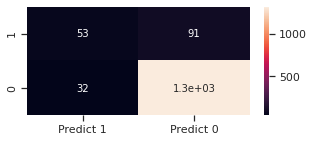

In [ ]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,2))
sns.heatmap(df_cm, annot=True)
#print(confusion_matrix(y_test,y_predict))
print("confusion matrix = ",metrics.confusion_matrix(y_test,y_predict))
print("average precision score = ",metrics.average_precision_score(y_test,y_predict))
print("recall score = ", metrics.recall_score(y_test,y_predict))
print("accuracy score = ",metrics.accuracy_score(y_test,y_predict))
print("roc_auc_score = ",metrics.roc_auc_score(y_test,y_predict))


# **Naive Bayes**

In [ ]:
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

prediction = naive_model.predict(X_test)
naive_model.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8866666666666667

confusion matrix =  [[1345   11]
 [  24  120]]
average precision score =  0.7793587786259543
recall score =  0.8333333333333334
accuracy score =  0.9766666666666667
roc_auc_score =  0.9126106194690266


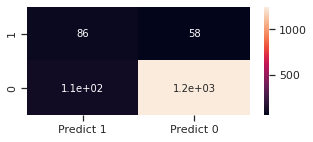

In [ ]:
# fitting the model

# predict the response
y_pred = naive_model.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,2))
sns.heatmap(df_cm, annot=True)
#print(confusion_matrix(y_test,y_predict))
print("confusion matrix = ",metrics.confusion_matrix(y_test,y_predict))
print("average precision score = ",metrics.average_precision_score(y_test,y_predict))
print("recall score = ", metrics.recall_score(y_test,y_predict))
print("accuracy score = ",metrics.accuracy_score(y_test,y_predict))
print("roc_auc_score = ",metrics.roc_auc_score(y_test,y_predict))



# **Random Forest classifier**

In [ ]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

confusion matrix =  [[1345   11]
 [  24  120]]
average precision score =  0.7793587786259543
recall score =  0.8333333333333334
accuracy score =  0.9766666666666667
roc_auc_score =  0.9126106194690266


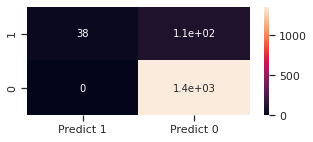

In [ ]:
predicted_random=randomforest_model.predict(X_test)
randomforest_model.score(X_test,y_test)

y_pred = randomforest_model.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])


df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,2))
sns.heatmap(df_cm, annot=True)
#print(confusion_matrix(y_test,y_predict))
print("confusion matrix = ",metrics.confusion_matrix(y_test,y_predict))
print("average precision score = ",metrics.average_precision_score(y_test,y_predict))
print("recall score = ", metrics.recall_score(y_test,y_predict))
print("accuracy score = ",metrics.accuracy_score(y_test,y_predict))
print("roc_auc_score = ",metrics.roc_auc_score(y_test,y_predict))


# **MODEL COMPARISION**

In this code section we are going to compare all the models that we have used above and after comparision we are going to plot a box plot which shows the accuracy and other details

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d arr

KNN: 0.928000 (0.010276)
CART: 0.982800 (0.002993)
NB: 0.881800 (0.011712)


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

RF: 0.986400 (0.004271)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

LR: 0.949400 (0.007432)


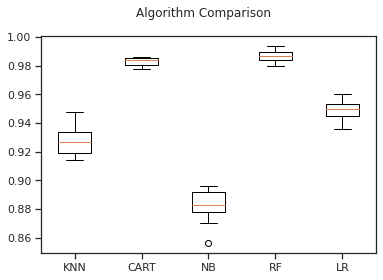

None


In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('LR',LogisticRegression(solver="liblinear")))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, dx, dy, cv=kfold, scoring=scoring)
	results.append(cv_results)
    
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 
	print(msg)
# boxplot algorithm comparison


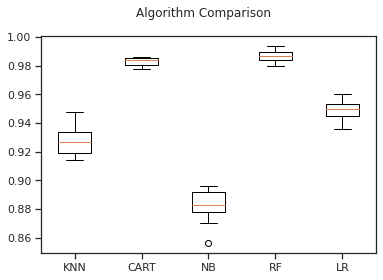

None


In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
print(plt.show())


As we can see random forest has highest accuracy

In [ ]:
print(cv_results)

[0.954 0.948 0.94  0.936 0.952 0.95  0.96  0.944 0.96  0.95 ]


#                       **Conclusion**


The aim of the bank is to convert there liablity into loan customers into loan customers.They want to set up a new marketing campaign; hence,they need information about the connection between the variables given in the data.So from classification alogorithms were used in the data.So from the above graph , it seems like Random forest algorithm have the highest accuracy and we can choose that as our final model. 
